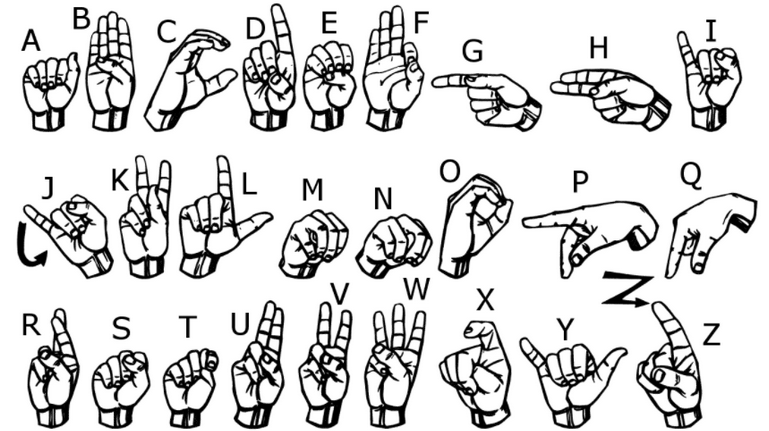

# Import lib

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2023-06-13 17:18:57.569155: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0
2.12.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

# Data load

In [3]:
data_directory = os.path.join(".", "dataset")
sign_lng_dataset = []
for label in tqdm(sorted(os.listdir(data_directory))):
    label_path = os.path.join(data_directory, label)
    for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)
        img = cv2.resize(cv2.imread(image_path),(50,50))
        sign_lng_dataset.append((img, label))

100%|███████████████████████████████████████████| 37/37 [00:01<00:00, 18.61it/s]


# EDA data

In [4]:
data_df = pd.DataFrame(sign_lng_dataset, columns=['Image', 'Label'])
data_df.head()

,Image,Label
0,"[[[61, 83, 111], [66, 90, 118], [68, 95, 122],...",0
1,"[[[63, 91, 126], [63, 89, 125], [71, 89, 126],...",0
2,"[[[55, 86, 117], [54, 90, 120], [48, 94, 125],...",0
3,"[[[77, 93, 130], [72, 92, 127], [61, 88, 122],...",0
4,"[[[53, 87, 116], [58, 90, 119], [64, 93, 124],...",0


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   55500 non-null  object
 1   Label   55500 non-null  object
dtypes: object(2)
memory usage: 867.3+ KB


### How much records ?

In [6]:
data_df.shape

(55500, 2)

### How much data in each category ?

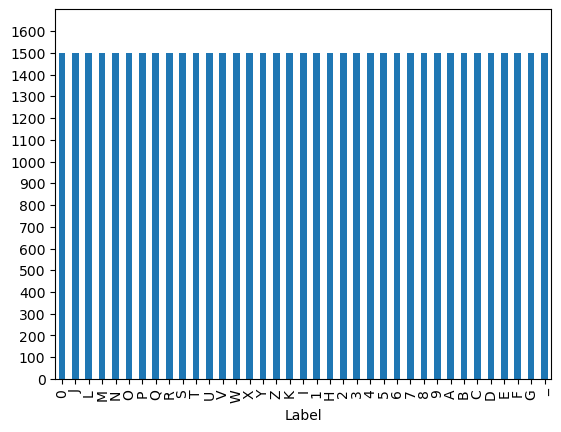

In [7]:
data_df["Label"].value_counts().plot(kind="bar")
plt.ylim(0, 1700)
plt.yticks(range(0, 1700, 100))
plt.show()

### How many class ?

In [8]:
data_df["Label"].unique().size

37

In [9]:
data_df["Label"].unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_'],
      dtype=object)

### Is any NaN values ?

In [10]:
data_df.isna().any(axis=0)

Image    False
Label    False
dtype: bool

### How image looks like ?

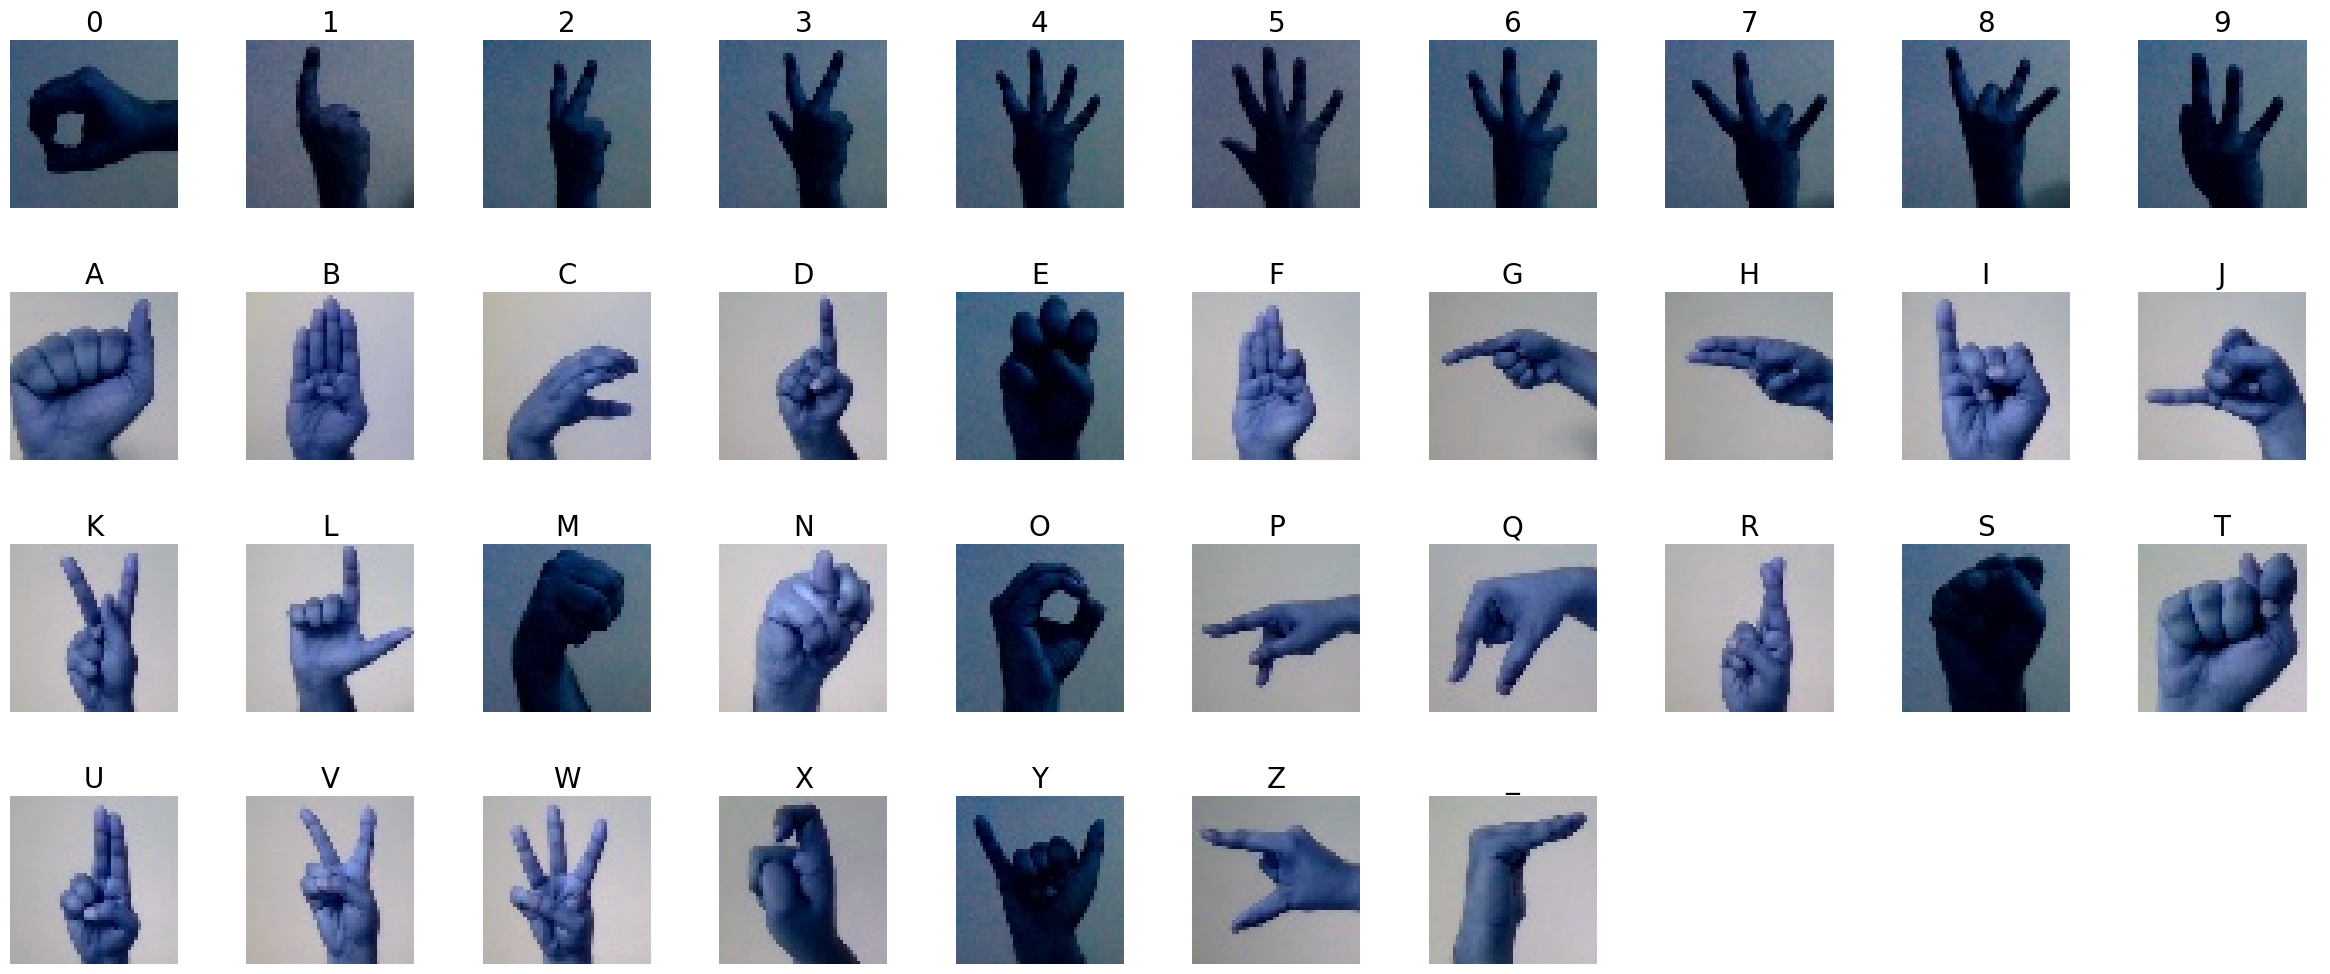

In [11]:
size_of_class = 1500
n_rows = 4
n_cols = 10
fig, axes = plt.subplots(4, 10, figsize=(n_cols * 3, n_rows * 3))

for i, ax in enumerate(axes.flat):
    if i*size_of_class < data_df.shape[0]:
        ax.imshow(sign_lng_dataset[i*size_of_class][0])
        ax.set_title(sign_lng_dataset[i*size_of_class][1], fontsize=20)
    ax.axis('off')
    
fig.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Split data to _Train_, _Validation_ and _Test_ dataset

In [12]:
X = [element[0] for element in sign_lng_dataset]
y = [element[1] for element in sign_lng_dataset]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [14]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))
print(len(X_val), len(y_val))

11100 11100
22200 22200
22200 22200


# One hot encoding

In [15]:
label_map = {label: id for id, label in enumerate(data_df["Label"].unique())}
print(label_map)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, '_': 36}


In [16]:
y_train = to_categorical([label_map[label] for label in y_train])
y_test = to_categorical([label_map[label] for label in y_test])
y_val = to_categorical([label_map[label] for label in y_val])
#X_train = [x / 255. for x in X_train]
#X_test = [x / 255. for x in X_test]
#X_val = [x / 255. for x in X_val]

In [17]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [18]:
X_train[0]

array([[[ 51,  91, 133],
        [ 59,  99, 141],
        [ 54,  90, 130],
        ...,
        [103, 117, 136],
        [103, 117, 135],
        [103, 118, 134]],

       [[ 55,  93, 135],
        [ 52,  91, 130],
        [ 52,  88, 128],
        ...,
        [ 97, 116, 137],
        [103, 119, 136],
        [104, 120, 136]],

       [[ 51,  87, 127],
        [ 59,  96, 134],
        [ 51,  87, 125],
        ...,
        [ 87, 117, 136],
        [ 97, 119, 137],
        [103, 121, 138]],

       ...,

       [[ 62,  82, 107],
        [ 69,  89, 114],
        [ 70,  85, 111],
        ...,
        [ 74,  91, 100],
        [ 84,  96, 106],
        [ 86,  96, 106]],

       [[ 66,  83, 109],
        [ 66,  83, 109],
        [ 70,  87, 114],
        ...,
        [ 71,  90,  97],
        [ 82,  97, 106],
        [ 81,  93, 105]],

       [[ 68,  85, 111],
        [ 67,  84, 110],
        [ 67,  85, 114],
        ...,
        [ 69,  91,  97],
        [ 79,  94, 103],
        [ 78,  90, 102]]

# Model

In [19]:
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu', input_shape=(50,50,3)),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(37, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 16)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        4640      
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        9248      
                                                        

2023-06-13 17:19:02.771813: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [20]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

In [21]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2023_06_13-17_19_02'

In [22]:
X_train[0].shape

(50, 50, 3)

In [23]:
from keras.callbacks import TensorBoard 
history = History()
tensorboard_cb = TensorBoard(run_logdir)
history = model.fit(np.asarray(X_train), np.asarray(y_train), epochs=20, verbose=1, validation_data=(np.asarray(X_val), np.asarray(y_val)), callbacks=[tensorboard_cb])

Epoch 1/20
347/347 [==============================] - 49s 139ms/step - loss: 0.6638 - accuracy: 0.8123 - val_loss: 0.1550 - val_accuracy: 0.9543
Epoch 2/20
347/347 [==============================] - 45s 129ms/step - loss: 0.0888 - accuracy: 0.9741 - val_loss: 0.0774 - val_accuracy: 0.9778
Epoch 3/20
347/347 [==============================] - 39s 112ms/step - loss: 0.0390 - accuracy: 0.9884 - val_loss: 0.0245 - val_accuracy: 0.9933
Epoch 4/20
347/347 [==============================] - 47s 137ms/step - loss: 0.0499 - accuracy: 0.9867 - val_loss: 0.0965 - val_accuracy: 0.9726
Epoch 5/20
347/347 [==============================] - 46s 133ms/step - loss: 0.0276 - accuracy: 0.9921 - val_loss: 0.0061 - val_accuracy: 0.9986
Epoch 6/20
347/347 [==============================] - 52s 151ms/step - loss: 0.0519 - accuracy: 0.9851 - val_loss: 0.0969 - val_accuracy: 0.9676
Epoch 7/20
347/347 [==============================] - 49s 140ms/step - loss: 0.0201 - accuracy: 0.9942 - val_loss: 0.0636 - val_ac

In [25]:
model.evaluate(np.asarray(X_test), np.asarray(y_test))

694/694 [==============================] - 6s 8ms/step - loss: 1.1315e-04 - accuracy: 1.0000


[0.00011314721632516012, 0.9999549388885498]

In [29]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [37]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights("model.h5")
#print("Loaded model from disk")

Saved model to disk
